<a href="https://colab.research.google.com/github/ArunabhaDeb2018/DeepLearning_CNN/blob/master/TF2_0_TransferLearningVGG16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning-1 with VGG16:-**
Cifar-10 is taken as dataset
We get features for both train and test images using only the convolutional blocks of VGG16.The Dense layers of VGG16 is not used to get the features.
Then we use these features as inputs for our own Dense layers

https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,BatchNormalization,Dropout,Input,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import  VGG16,preprocess_input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train,X_test=X_train/255.0,X_test/255.0;

In [ ]:
K=len(set(y_train[:,0]))
K

10

In [ ]:
conv_layers_vgg16=VGG16(weights='imagenet', input_shape=X_train[0].shape,include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_layers_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
#getting train and test features after passing train and test images through the conv_layers_vgg16()

In [ ]:
train_features=conv_layers_vgg16.predict(X_train)

In [ ]:
train_features.shape

(50000, 1, 1, 512)

In [ ]:
test_features=conv_layers_vgg16.predict(X_test)

In [ ]:
len(X_train)

50000

In [ ]:
train_features=train_features.reshape(len(train_features),-1)

In [ ]:
train_features.shape

(50000, 512)

In [ ]:
test_features=test_features.reshape(len(test_features),-1)

In [ ]:
i=Input(shape=train_features[0].shape)

In [ ]:
x=Dense(1024,activation='relu')(i)
x=Dropout(0.3)(x)

In [ ]:
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)

In [ ]:
x=Dense(K,activation='softmax')(x)

In [ ]:
model=Model(inputs=i,outputs=x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_features,y_train,epochs=50,batch_size=32,validation_data=(test_features,y_test))

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4221 - accuracy: 0.5000 - val_loss: 1.2420 - val_accuracy: 0.5635
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2460 - accuracy: 0.5644 - val_loss: 1.1932 - val_accuracy: 0.5814
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1824 - accuracy: 0.5898 - val_loss: 1.1653 - val_accuracy: 0.5963
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1406 - accuracy: 0.6028 - val_loss: 1.1612 - val_accuracy: 0.5917
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1085 - accuracy: 0.6134 - val_loss: 1.1471 - val_accuracy: 0.6021
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0726 - accuracy: 0.6241 - val_loss: 1.1110 - val_accuracy: 0.6146
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0435 - accuracy: 0.6321 - val_loss: 1.1026 - val_accuracy:

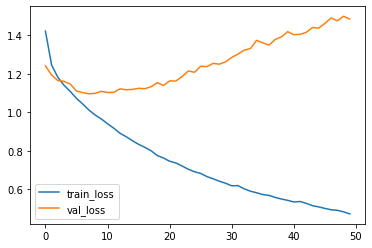

In [ ]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()

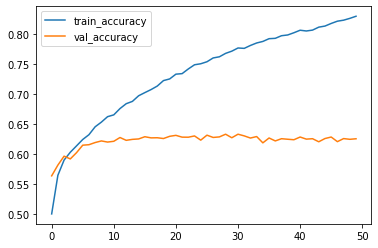

In [ ]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 657,802
Trainable params: 657,802
Non-trainable params: 0
________________________________________________